In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
data=pd.read_csv('HistoricalPrices.csv')
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by="Date")
data

,Date,Open,High,Low,Close
63,2024-08-05,39056.19,39056.19,38499.27,38703.27
62,2024-08-06,38736.22,39449.53,38638.30,38997.66
61,2024-08-07,39230.09,39477.96,38731.51,38763.45
60,2024-08-08,38940.38,39508.40,38922.79,39446.49
59,2024-08-09,39408.06,39628.66,39230.43,39497.54
...,...,...,...,...,...
4,2024-10-28,42264.54,42476.46,42264.54,42387.57
3,2024-10-29,42323.48,42491.86,42171.65,42233.05
2,2024-10-30,42249.81,42457.92,42141.54,42141.54
1,2024-10-31,41956.34,41991.91,41704.63,41763.46


In [92]:
print(data.columns)
data.columns = data.columns.str.strip()


Index(['Date', ' Open', ' High', ' Low', ' Close'], dtype='object')


## plot line

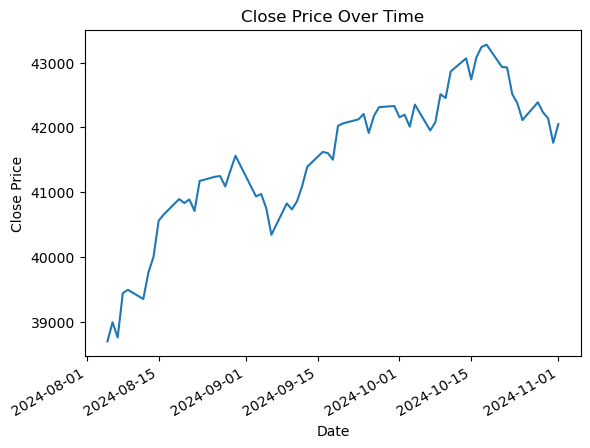

In [94]:
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.gcf().autofmt_xdate()  # Format x-axis dates
plt.show()


### plot line with multiple line

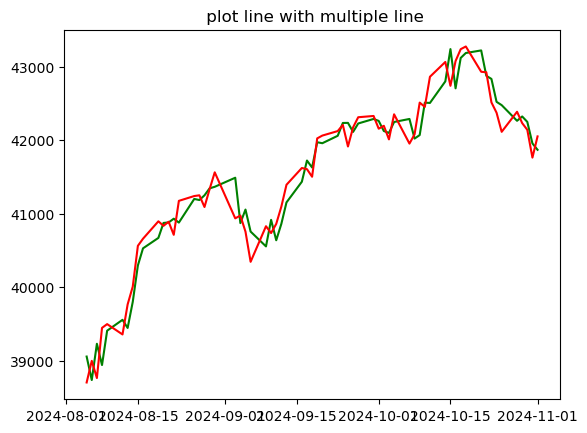

In [172]:
plt.plot(data['Date'],data['Open'],color='green')
plt.plot(data['Date'],data['Close'],color='red')
plt.title(" plot line with multiple line")
plt.show()


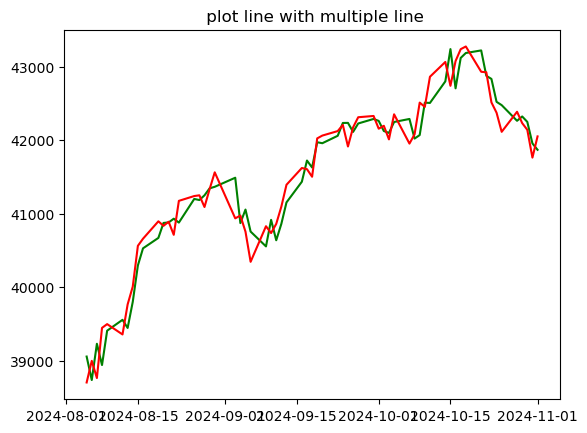

In [193]:
plt.plot(data['Date'],data['Open'],color='green')
plt.plot(data['Date'],data['Close'],color='red')
plt.title(" plot line with multiple line")
plt.savefig('line pl Open vs. Close.png')

### Adding a Legend

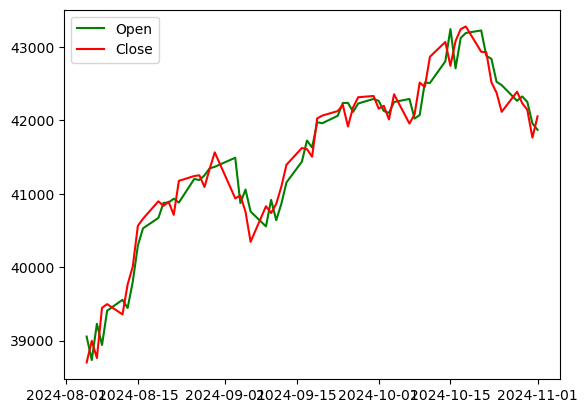

In [174]:
plt.plot(data['Date'],data['Open'],label='Open',color='green')
plt.plot(data['Date'],data['Close'],label='Close',color='red')
plt.legend()
plt.show()

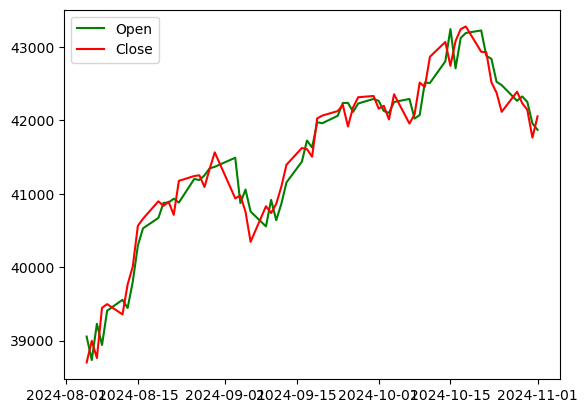

In [195]:
plt.plot(data['Date'],data['Open'],label='Open',color='green')
plt.plot(data['Date'],data['Close'],label='Close',color='red')
plt.legend()
plt.savefig('plot line Open vs. Close.png')

## Bar plot


In [125]:
from calendar import month_name
for i in month_name:
    print(i)


January
February
March
April
May
June
July
August
September
October
November
December


In [133]:
data['Month'] = pd.Categorical(data['Date'].dt.month_name(), categories=list(month_name[1:]), ordered=True)
print(data['Month'].unique())


['August', 'September', 'October', 'November']
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


In [135]:
print(data['Month'].isna().sum())




0


In [139]:
# Import the calendar package 
from calendar import month_name

# Order by months by chronological order
data['Month'] = pd.Categorical(data['Date'].dt.month_name(), categories=list(month_name[1:]), ordered=True)
monthly_mean = data.groupby('Month').mean().reset_index()
print(monthly_mean.head(6))

      Month Date  Open  High  Low  Close
0   January  NaT   NaN   NaN  NaN    NaN
1  February  NaT   NaN   NaN  NaN    NaN
2     March  NaT   NaN   NaN  NaN    NaN
3     April  NaT   NaN   NaN  NaN    NaN
4       May  NaT   NaN   NaN  NaN    NaN
5      June  NaT   NaN   NaN  NaN    NaN


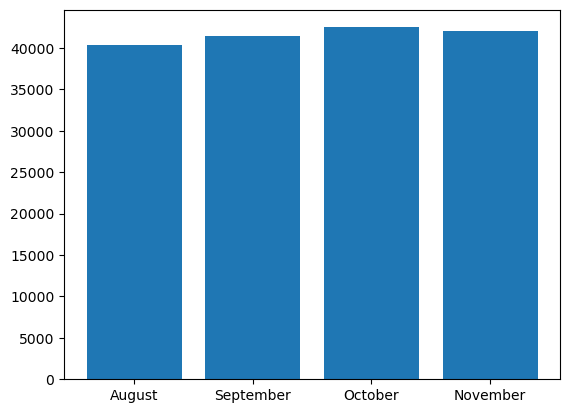

In [145]:
plt.bar(monthly_mean['Month'],height=monthly_mean['Close'])
plt.show()

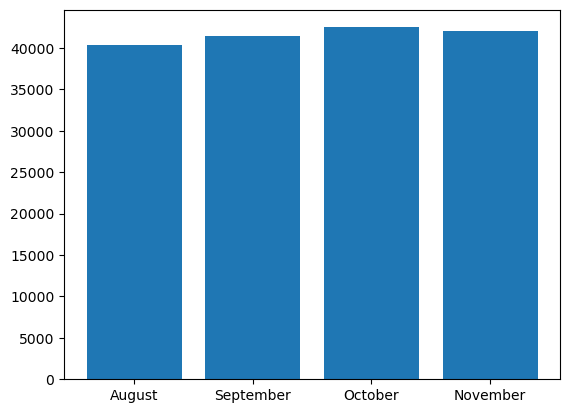

In [197]:
plt.bar(monthly_mean['Month'],height=monthly_mean['Close'])
plt.savefig('bar plot Open vs. Close.png')


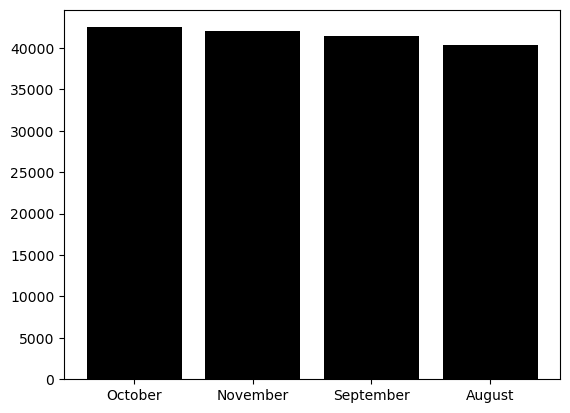

In [180]:
monthly_mean_srtd = monthly_mean.sort_values(by = 'Close', ascending = False)

plt.bar(monthly_mean_srtd['Month'], height = monthly_mean_srtd['Close'],color='black')
plt.show()

## Scatter plot

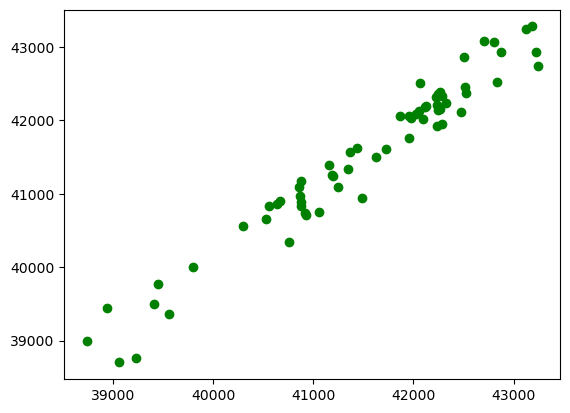

In [176]:
plt.scatter(data['Open'],data['Close'],color='green')
plt.show()

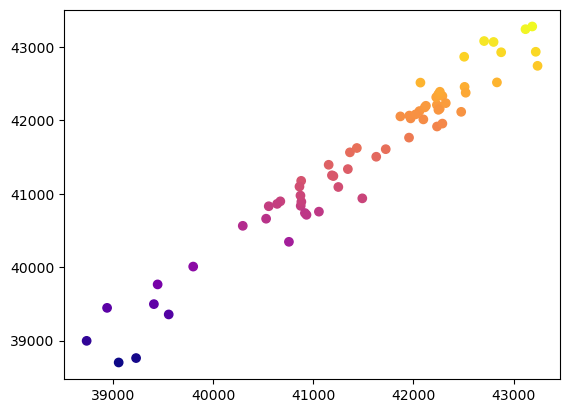

In [188]:
plt.scatter(data['Open'],data['Close'], c=data['Close'], cmap = plt.cm.plasma)

plt.show()

### Scatter plot with trend line

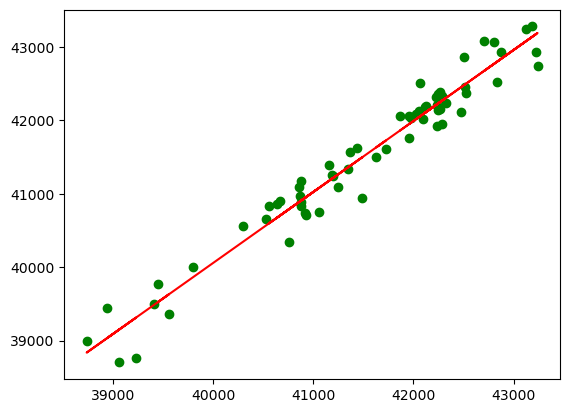

In [178]:
z=np.polyfit(data['Open'],data['Close'],1)
p=np.poly1d(z)
plt.scatter(data['Open'],data['Close'],color='green')
plt.plot(data['Open'],p(data['Open']),color='red')
plt.show()

### saving plots

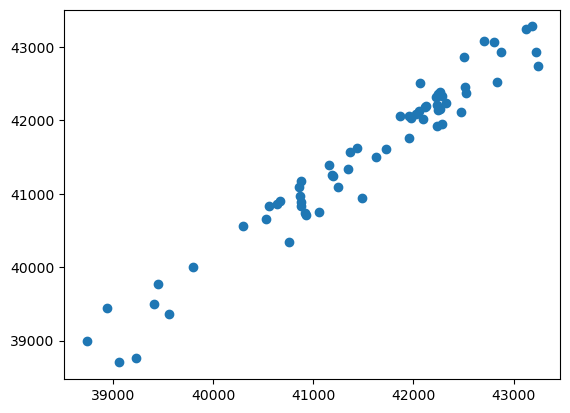

In [191]:
plt.scatter(data['Open'],data['Close'])
plt.savefig('Scatterplot Open vs. Close.png')